<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Edge Detection
</div>



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
Sobel Edge Detection
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [4]:
img = cv2.imread('content/images/sachin.jpg', 0)

In [5]:
img

array([[ 19,  19,  19, ...,  26,  27,  27],
       [ 19,  19,  19, ...,  26,  25,  25],
       [ 19,  19,  19, ...,  26,  24,  24],
       ...,
       [184, 185, 186, ..., 135, 132, 132],
       [185, 186, 187, ..., 133, 132, 132],
       [186, 187, 188, ..., 132, 132, 132]], dtype=uint8)

In [6]:
help(cv2.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .   
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .   
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .   
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .   
    .   for the x-derivative, or transposed for the y-derivative.
    . 

In [7]:
# define the sobel operators
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)


In [8]:
sobelx, sobely

(array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
        [  0.,   0.,   0., ...,  -4.,  -3.,   0.],
        [  0.,   0.,   0., ...,  -5.,  -4.,   0.],
        ...,
        [  0.,  11.,   8., ..., -15., -13.,   0.],
        [  0.,   8.,   2., ...,  -7.,  -5.,   0.],
        [  0.,   8.,   2., ...,  -4.,  -2.,   0.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  -4.,  -9., -12.],
        [  4.,   4.,   4., ...,  -1.,   2.,   4.],
        ...,
        [ 46.,  43.,  34., ..., -23., -13.,  -8.],
        [  8.,   8.,   8., ...,  -9.,  -3.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

In [9]:
final_sobel = cv2.add(sobelx, sobely)

In [10]:
final_sobel

array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,  -8., -12., -12.],
       [  4.,   4.,   4., ...,  -6.,  -2.,   4.],
       ...,
       [ 46.,  54.,  42., ..., -38., -26.,  -8.],
       [  8.,  16.,  10., ..., -16.,  -8.,   0.],
       [  0.,   8.,   2., ...,  -4.,  -2.,   0.]])

In [11]:
thresh, binary_sobel = cv2.threshold(final_sobel, 60, 255, cv2.THRESH_BINARY) # above 60 white , below it black

In [12]:
thresh

60.0

In [13]:
binary_sobel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

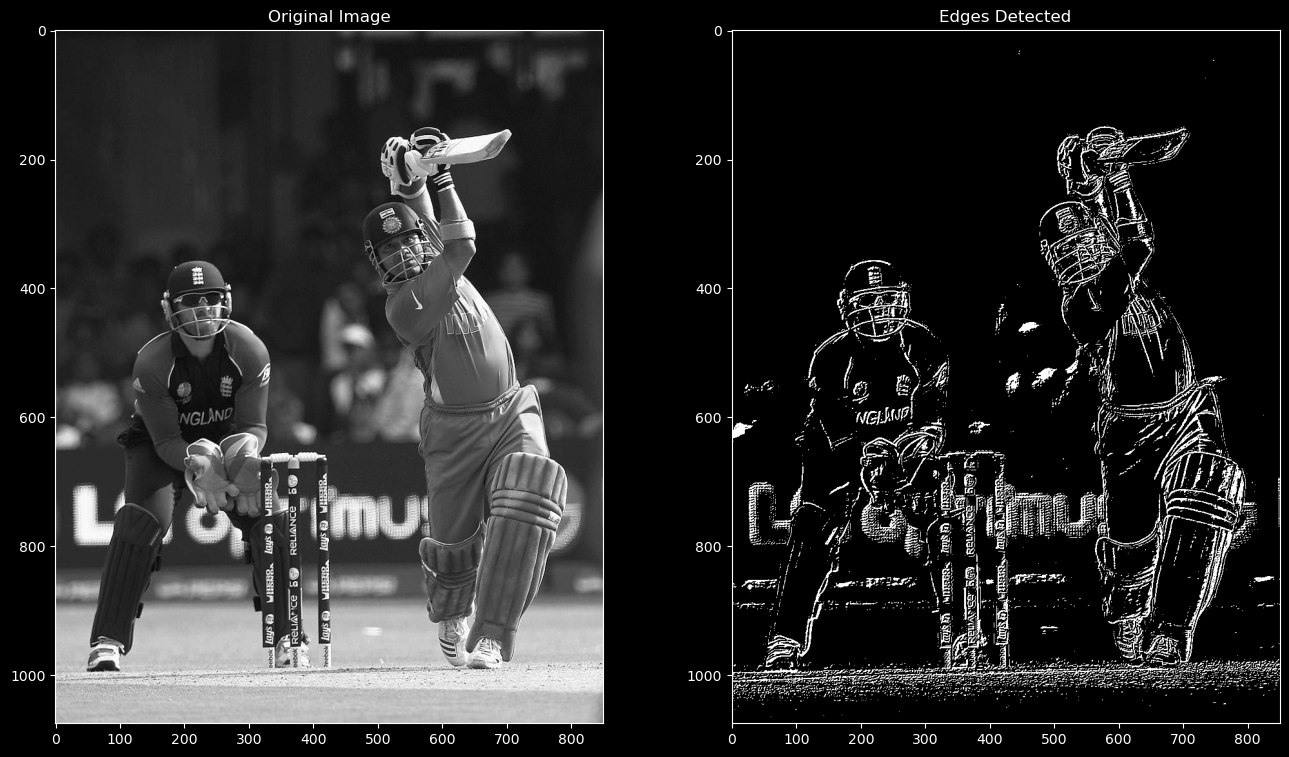

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.imshow(binary_sobel, cmap = 'gray')

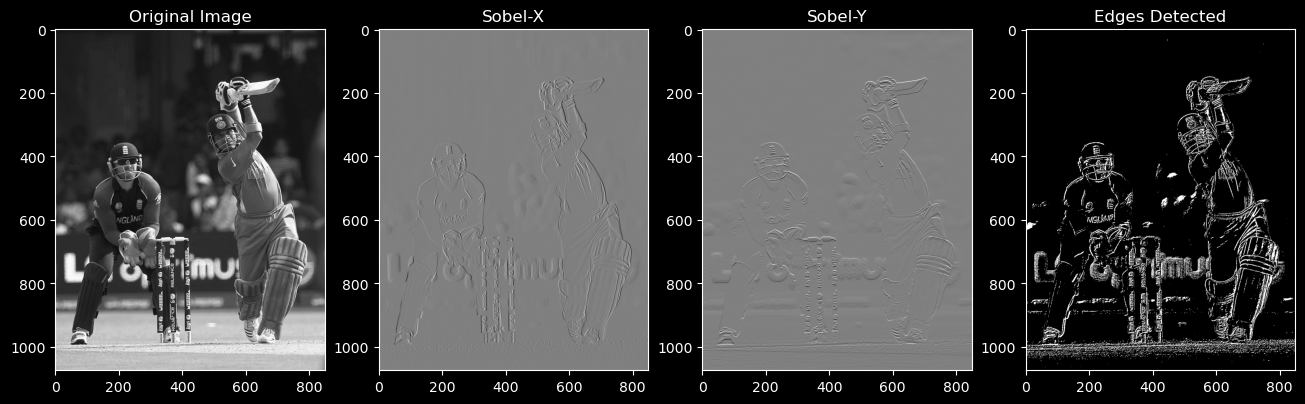

In [15]:
plt.figure(figsize=(16,9))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 4, 2)
plt.title('Sobel-X')
plt.imshow(sobelx, cmap = 'gray')

plt.subplot(1, 4, 3)
plt.title('Sobel-Y')
plt.imshow(sobely, cmap = 'gray')


plt.subplot(1, 4, 4)
plt.title('Edges Detected')
plt.imshow(binary_sobel, cmap = 'gray')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
Canny Edge Detection
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [16]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

In [18]:
edges = cv2.Canny(img, 60, 255)

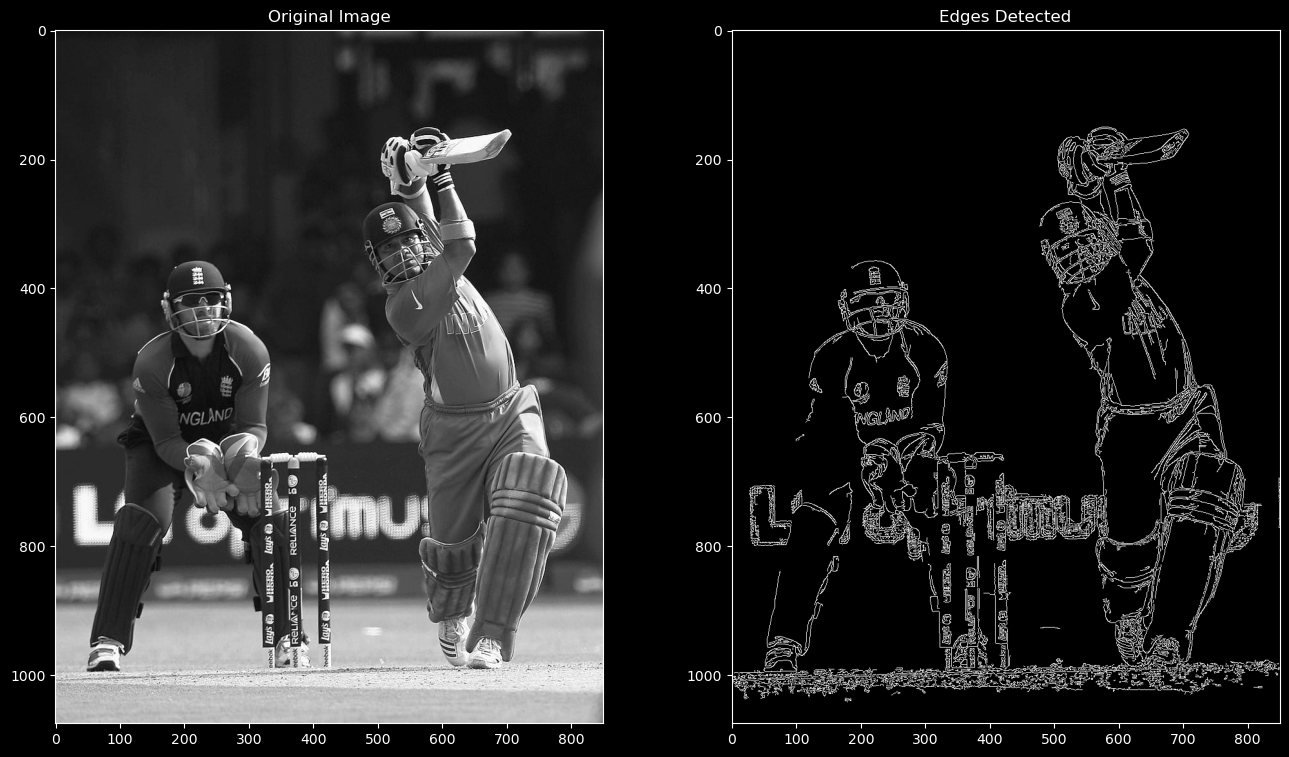

In [19]:
plt.figure(figsize=(16,9))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.imshow(edges, cmap = 'gray')

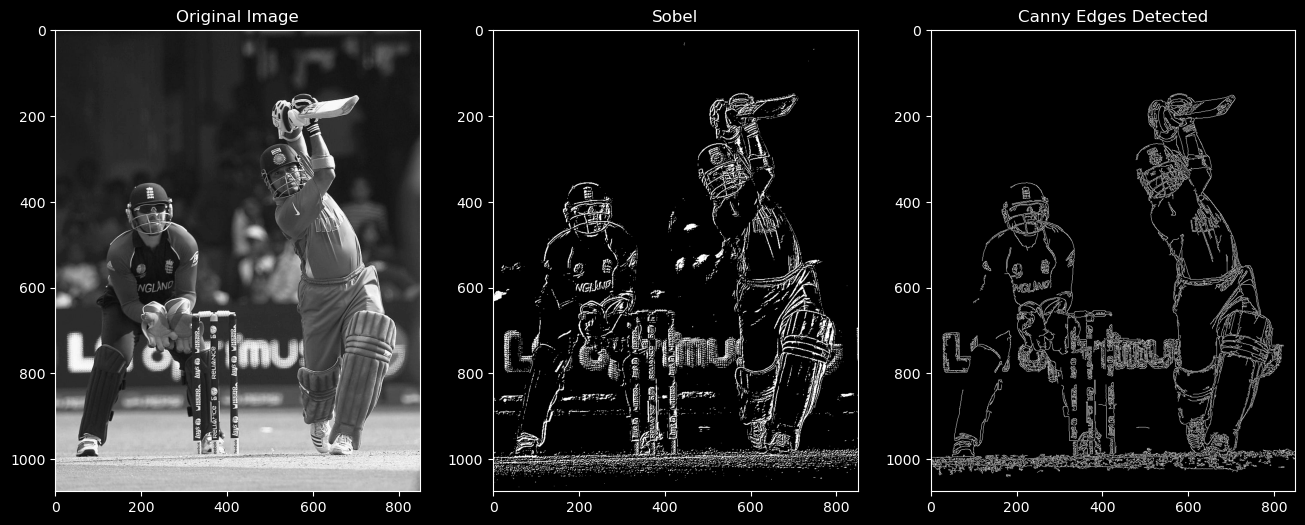

In [20]:
plt.figure(figsize=(16,9))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title('Sobel')
plt.imshow(binary_sobel, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title('Canny Edges Detected')
plt.imshow(edges, cmap = 'gray')

In [22]:
imgC = cv2.imread('content/images/sachin.jpg', 0)

In [23]:
# define the sobel operators
sobelx = cv2.Sobel(imgC, cv2.CV_64F, 1, 0, ksize = 3)
sobely = cv2.Sobel(imgC, cv2.CV_64F, 0, 1, ksize = 3)


In [24]:
final_sobel = cv2.add(sobelx, sobely)

In [25]:
thresh, binary_sobelC = cv2.threshold(final_sobel, 60, 255, cv2.THRESH_BINARY) # above 60 white , below it black

In [26]:
#Canny()
edgesC = cv2.Canny(imgC, 60, 255)

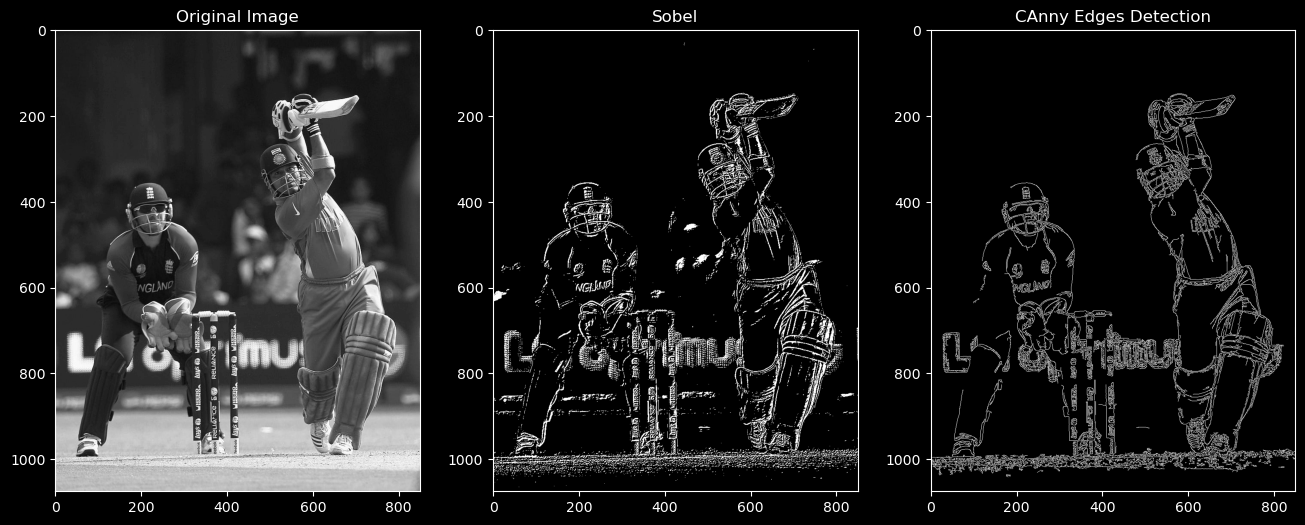

In [27]:
plt.figure(figsize=(16,9))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(imgC, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title('Sobel')
plt.imshow(binary_sobelC, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title('CAnny Edges Detection')
plt.imshow(edgesC, cmap = 'gray')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
     Thresholding
</div>



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread('images/sachin.jpg', 0)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
Binary Thresholding
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [28]:
binary_image = img > 127

In [29]:
binary_image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

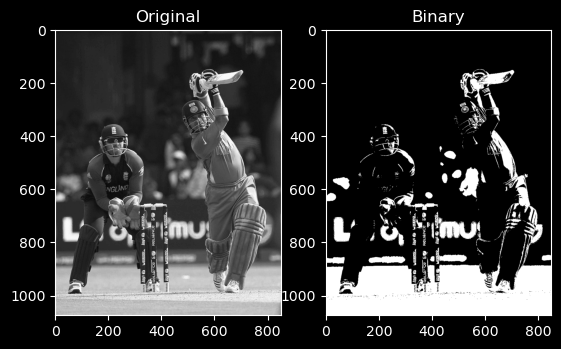

In [30]:
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(binary_image, cmap = 'gray')

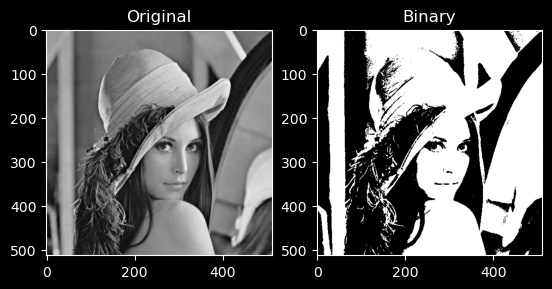

In [31]:
lenna  = cv2.imread('content/images/lenna.png', 0)

binary_lenna = lenna > 127 # datatype is Boolean

new_lenna = binary_lenna.astype(np.uint8) * 255


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(new_lenna, cmap = 'gray')

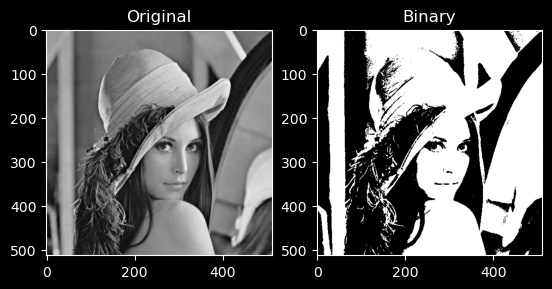

In [35]:
lenna  = cv2.imread('content/images/lenna.png', 0)

binary_lenna = lenna > 127

new_lenna = binary_lenna.astype(np.uint8) * 255  # data type change to integer


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(new_lenna, cmap = 'gray')

In [36]:
binary_lenna


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [37]:
binary_lenna.astype(np.uint8) * 255

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

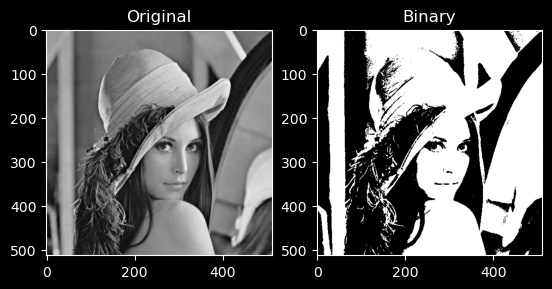

In [39]:
## Using libraries


lenna  = cv2.imread('content/images/lenna.png', 0)

thresh, new_lenna = cv2.threshold(lenna, 127, 255, cv2.THRESH_BINARY ) #DataType conversion using Libraries


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(new_lenna, cmap = 'gray')

In [40]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
 Inverse Binary Thresholding
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>



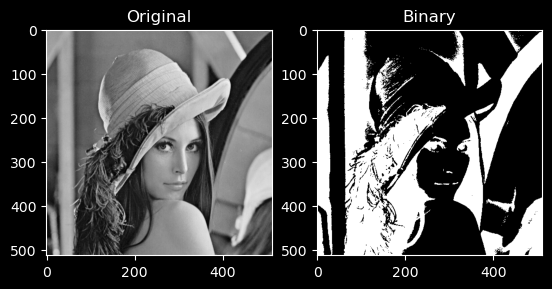

In [41]:
lenna  = cv2.imread('content/images/lenna.png', 0)

binary_lenna = lenna < 127

new_lenna = binary_lenna.astype(np.uint8) * 255  # data type change to integer


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(new_lenna, cmap = 'gray')

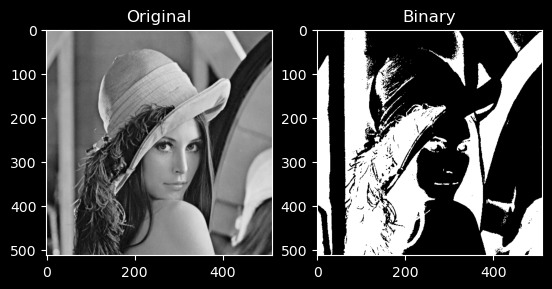

In [42]:
## using libraries


## Using libraries


lenna  = cv2.imread('content/images/lenna.png', 0)

thresh, new_lenna = cv2.threshold(lenna, 127, 255, cv2.THRESH_BINARY_INV ) #DataType conversion using Libraries


plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Binary')
plt.imshow(new_lenna, cmap = 'gray')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
Otsu thresholding
<br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


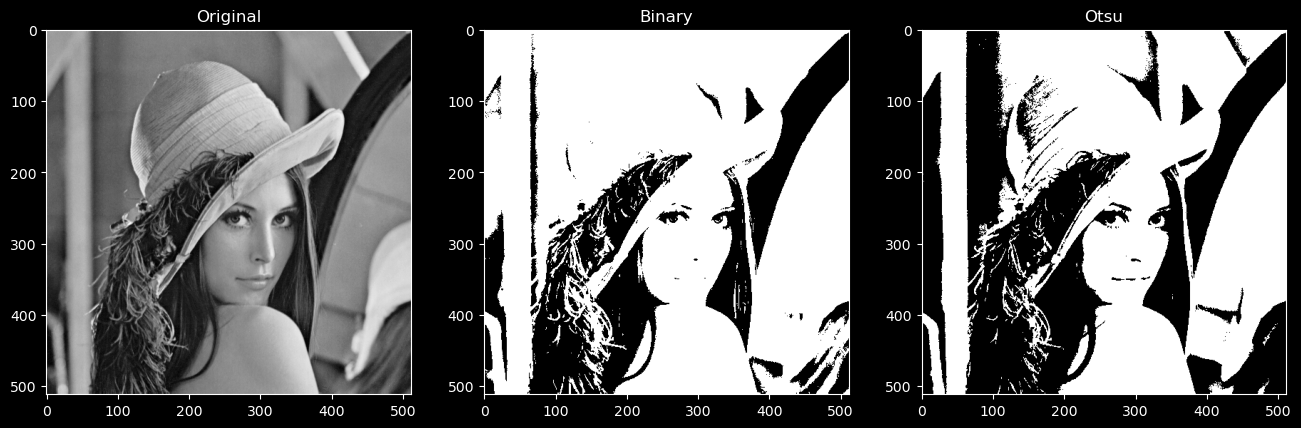

In [43]:
## Using libraries


lenna  = cv2.imread('content/images/lenna.png', 0)

thresh_otsu, lenna_otsu = cv2.threshold(lenna, 100, 255, cv2.THRESH_OTSU ) #DataType conversion using Libraries
thresh_bin, lenna_bin = cv2.threshold(lenna, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize =(16,9))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(lenna, cmap = 'gray')
 
plt.subplot(1, 3, 2)
plt.title('Binary')
plt.imshow(lenna_bin, cmap = 'gray')


plt.subplot(1, 3, 3)
plt.title('Otsu')
plt.imshow(lenna_otsu, cmap = 'gray')


In [44]:
thresh_otsu, thresh_bin

(124.0, 100.0)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Corner Detection
</div>



In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
img = cv2.imread('content/images/circle.png', 0)

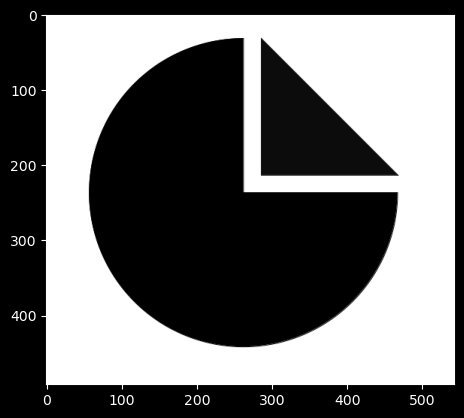

In [47]:
plt.imshow(img, cmap = 'gray')

In [48]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

In [49]:
corners  = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.04)

In [50]:
corners


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

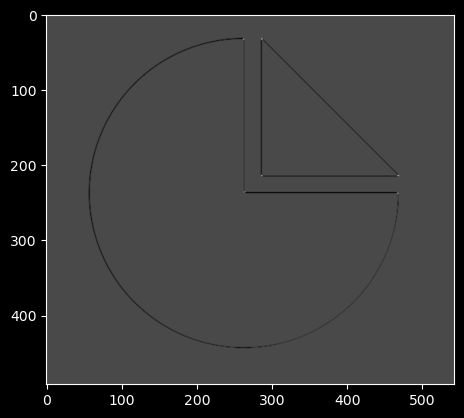

In [51]:
plt.imshow(corners, cmap = 'gray')

In [52]:
corners.shape, corners.max()

((492, 543), 0.026689459)

In [53]:
new  = corners > corners.max() / 2

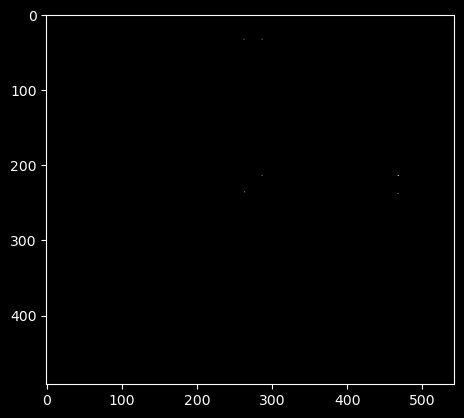

In [54]:
plt.imshow(new, cmap = 'gray')

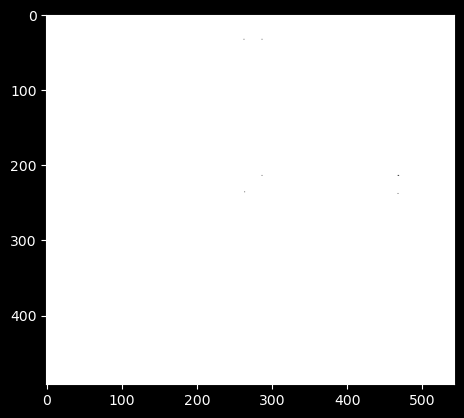

In [55]:
new  = corners < corners.max() / 2
plt.imshow(new, cmap = 'gray')

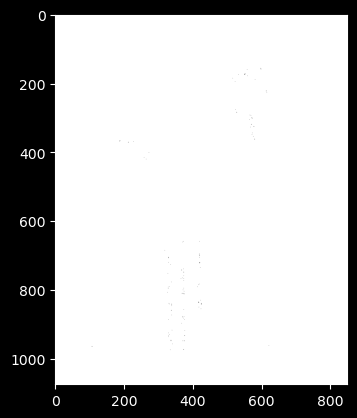

In [57]:
## For lenna 

imgL = cv2.imread('content/images/sachin.jpg', 0)

cornersL  = cv2.cornerHarris(imgL, blockSize = 2, ksize = 3, k = 0.04)

newL  = cornersL < cornersL.max() / 2
plt.imshow(newL, cmap = 'gray')